In [99]:
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
%matplotlib inline

In [101]:
def ytrue(x):
    t0 = random.randint(1,5)
    if t0%2 == 0 :
        y = 3*x + 2 + random.randint(-3,3)
    else:
        y = 1.5*x + 5 + random.randint(-3,3)
    return y

def cost_func(y_true,y_pred):
    err_kuadrat = ((y_true-y_pred)**2)
    return err_kuadrat.sum()/len(err_kuadrat)

<AxesSubplot:xlabel='x', ylabel='target'>

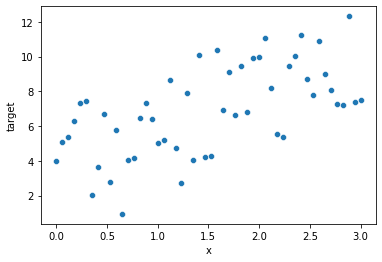

In [80]:
x0 = np.linspace(0, 3, num=52)
y0 = np.array([ytrue(i) for i in x0 ])

df = pd.DataFrame({'x':x0, 'target':y0})
sns.scatterplot(x = 'x', y = 'target', data = df)

In [82]:
df.head()

,x,target
0,0.000000,4.000000
1,0.058824,5.088235
2,0.117647,5.352941
3,0.176471,6.264706
4,0.235294,7.352941


## Manual

In [81]:
## regresi linear
def ypred(x,m = 1,c = 1):
    yp = m*x + c
    return yp
    

In [83]:
df['prediksi'] = np.array([ypred(i, m = 1, c = 1) for i in x0])

In [84]:
df.head()

,x,target,prediksi
0,0.000000,4.000000,1.000000
1,0.058824,5.088235,1.058824
2,0.117647,5.352941,1.117647
3,0.176471,6.264706,1.176471
4,0.235294,7.352941,1.235294


In [86]:
cost_func(df['target'],df['prediksi']) ## m = 1, c = 1

24.033620574926804

In [87]:
df['prediksi'] = np.array([ypred(i, m = 2, c = 1) for i in x0])
cost_func(df['target'],df['prediksi']) ## m = 2, c = 1

12.69857931860527

In [120]:
df_param = []
for opsi_m in np.linspace(-10, 10, num=25):
    for opsi_c in np.linspace(3, 5, num=25):
        df['prediksi'] = np.array([ypred(i, m = opsi_m, c = opsi_c) for i in x0])
        cost_temp = cost_func(df['target'],df['prediksi']) ## m = 2, c = 1
        # print('m,c -->',opsi_m,opsi_c,": cost = ",cost_temp)
        df_param.append((opsi_m,opsi_c,cost_temp))
        
df_param = pd.DataFrame(df_param, columns = ['opsi_m','opsi_c','cost_f'])
        

In [121]:
mat = df_param.groupby(['opsi_m','opsi_c']).mean().unstack()

<AxesSubplot:xlabel='None-opsi_c', ylabel='opsi_m'>

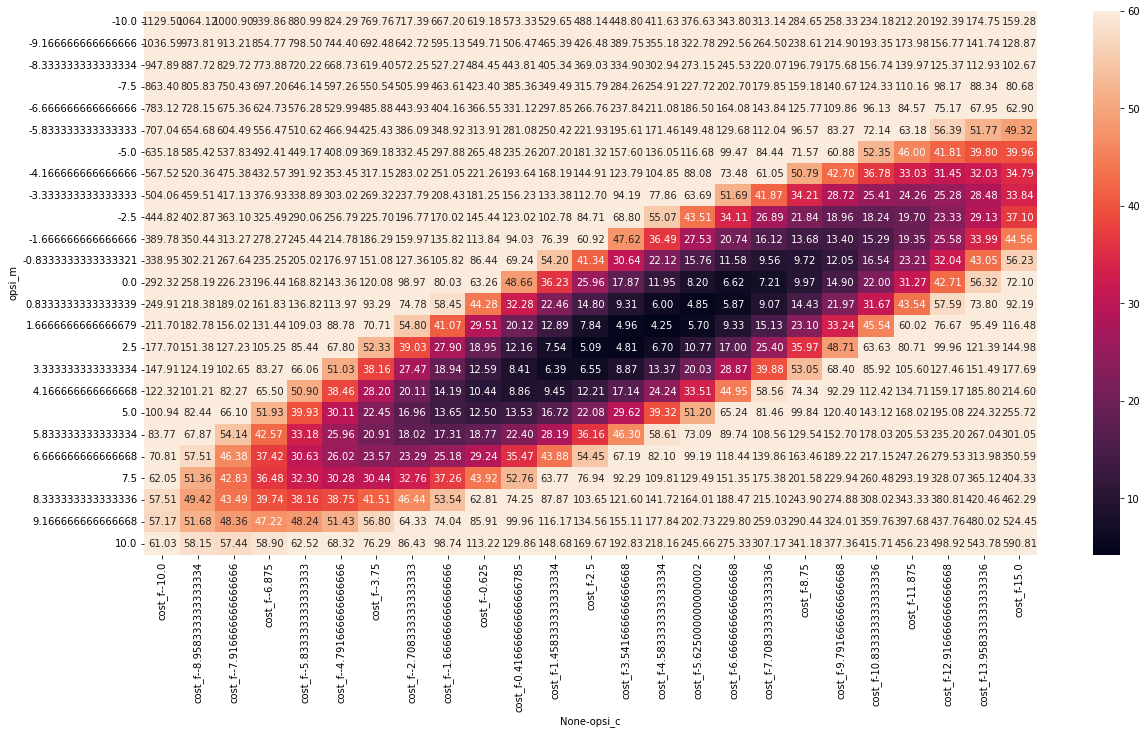

In [122]:
plt.figure(figsize = (20,10))
sns.heatmap(mat, annot=True, fmt = '.2f', vmax = 60)

In [123]:
df_param = []
for opsi_m in np.linspace(0, 3, num=25):
    for opsi_c in np.linspace(3, 5, num=25):
        df['prediksi'] = np.array([ypred(i, m = opsi_m, c = opsi_c) for i in x0])
        cost_temp = cost_func(df['target'],df['prediksi']) ## m = 2, c = 1
        # print('m,c -->',opsi_m,opsi_c,": cost = ",cost_temp)
        df_param.append((opsi_m,opsi_c,cost_temp))
        
df_param = pd.DataFrame(df_param, columns = ['opsi_m','opsi_c','cost_f'])
        

In [124]:
mat = df_param.groupby(['opsi_m','opsi_c']).mean().unstack()

<AxesSubplot:xlabel='None-opsi_c', ylabel='opsi_m'>

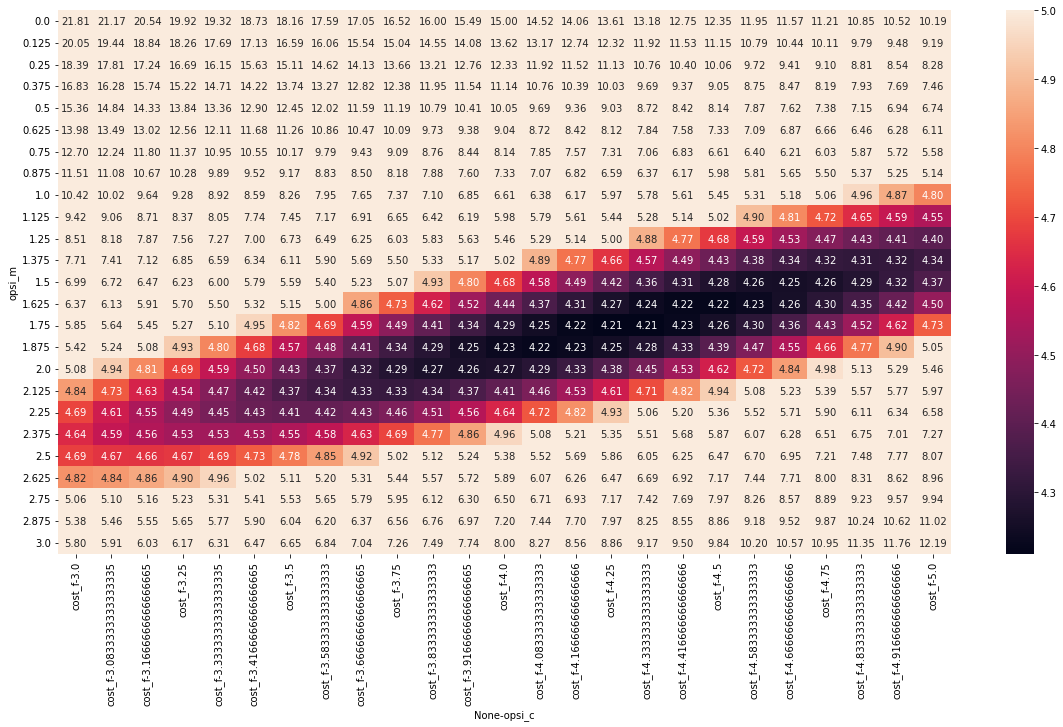

In [125]:
plt.figure(figsize = (20,10))
sns.heatmap(mat, annot=True, fmt = '.2f', vmax = 5)

## Gradient Descent

In [189]:
## update M
def update_m(L,df,m0):
    err = df['target'] - df['prediksi']
    x0 = df['x']
    m_temp = (err*x0).sum()
    Dm = (-2/len(df))*m_temp
    
    m = m0 - (L*Dm)
    
    return m

## update c

def update_c(L,df,c0):
    err = df['target'] - df['prediksi']
    c_temp = (err).sum()
    Dc = (-2/len(df))*c_temp
    c = c0 - (L*Dc)
    return c


In [225]:
m0 = 3
c0 = -1
df['prediksi'] = np.array([ypred(i, m = m0, c = c0) for i in x0])
cost_func(df['target'],df['prediksi'])

17.040008650519034

In [226]:
for i in range(2000):
    Lr = 0.001
    m0 = update_m(Lr,df,m0)
    c0 = update_m(Lr,df,c0)
    df['prediksi'] = np.array([ypred(i, m = m0, c = c0) for i in x0])
    new_cost = cost_func(df['target'],df['prediksi'])
    if i%200 == 0:
        print(m0,c0,new_cost)

3.008246805962204 -0.9917531940377962 16.916325864411377
3.7641988994409954 -0.2358011005590076 9.63968933733297
3.886680053428388 -0.11331994657161687 9.217016482563405
3.906524740957526 -0.09347525904248104 9.16838797645551
3.9097400243730442 -0.09025997562696562 9.161030261487396
3.910260972230092 -0.08973902776991867 9.159851828947891
3.9103453774394294 -0.08965462256058272 9.159661255675875
3.910359052971954 -0.08964094702805721 9.15963038797022
3.91036126871422 -0.08963873128578996 9.159625386958734
3.9103616277140443 -0.08963837228596247 9.159624576689465
